In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6) # set default figure size, 8in by 6in

# Theano Baby Steps 

[Theano Basic Tutorial](http://deeplearning.net/software/theano/tutorial/)

## Adding Two Scalars

In [22]:
import theano
from theano import tensor as T
from theano import function

In [24]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = function([x,y], z)

In [31]:
print f(16.1,12.2)
print z.eval({x: 16.1, y: 12.2})

28.3
28.3


In [5]:
np.allclose(f(16.3, 12.1), 28.4)

True

In [26]:
type(x)

theano.tensor.var.TensorVariable

In [27]:
x.type

TensorType(float64, scalar)

In [8]:
T.dscalar

TensorType(float64, scalar)

In [9]:
x.type is T.dscalar

True

In [28]:
type(z)

theano.tensor.var.TensorVariable

In [10]:
from theano import pp
print(pp(z))

(x + y)


In [29]:
type(f)

theano.compile.function_module.Function

## Adding two Matrices

In [32]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
f = function([x, y], z)

In [34]:
x.type

TensorType(float64, matrix)

In [35]:
f([[1, 2], [3,4]], [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

In [14]:
f(np.array([[1, 2], [3,4]]), np.array([[10, 20], [30, 40]]))

array([[ 11.,  22.],
       [ 33.,  44.]])

# More Examples

In [37]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
logistic([[0, 10], [-10, -2]])

array([[  5.00000000e-01,   9.99954602e-01],
       [  4.53978687e-05,   1.19202922e-01]])

In [16]:
s2 = (1 + T.tanh(x / 2)) / 2
logistic2 = theano.function([x], s2)
logistic2([[0, 1], [-1, -2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [18]:
a, b = T.dmatrices('a', 'b')
diff = a - b
abs_diff = abs(diff)
diff_squared = diff**2
f = theano.function([a, b], [diff, abs_diff, diff_squared])

f([[1, 1], [1, 1]], [[0, 1], [2, 3]])

[array([[ 1.,  0.],
        [-1., -2.]]), array([[ 1.,  0.],
        [ 1.,  2.]]), array([[ 1.,  0.],
        [ 1.,  4.]])]

## Using Shared Variables

In [41]:
from theano import shared
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state+inc)])

In [42]:
print(state.get_value())
accumulator(1)
print(state.get_value())
accumulator(1)
print(state.get_value())
accumulator(1)
print(state.get_value())

0
1
2
3


In [43]:
from theano.tensor.shared_randomstreams import RandomStreams
from theano import function
srng = RandomStreams(seed=234)
rv_u = srng.uniform((2,2))
rv_n = srng.normal((2,2))
f = function([], rv_u)
g = function([], rv_n, no_default_updates=True)    #Not updating rv_n.rng
nearly_zeros = function([], rv_u + rv_u - 2 * rv_u)

In [52]:
g()

array([[ 0.37328447, -0.65746672],
       [-0.36302373, -0.97484625]])

# NVIDIA Deep Learning: Getting started with Theano

[video](https://www.youtube.com/watch?v=BuIsI-YHzj8)

## Example Theano Application

In [53]:
import theano
from theano import tensor as T

In [54]:
# initialize symbolic variables
a = T.scalar()
b = T.scalar()

# define symbolic expression
y = a * b

# compile a Theano function
multiply = theano.function(inputs=[a,b], outputs = y)

In [55]:
print multiply(3,2) # 6
print multiply(4, 5) # 20

6.0
20.0


## Theano for Deep Learning

- Symbolic computation for tensors (multi-dimensional n-dimensional matrices)
- sub-modules of tensor operations relevant to deep learning
- highly expressive
- symbolic differentiation (e.g. for computing gradients)
- transparent GPU acceleration
- easily integrates with Python scientific computing ecosystem

## Example: Fit a Linear model

[-1.5, 1.5, -3.5, 3.5]

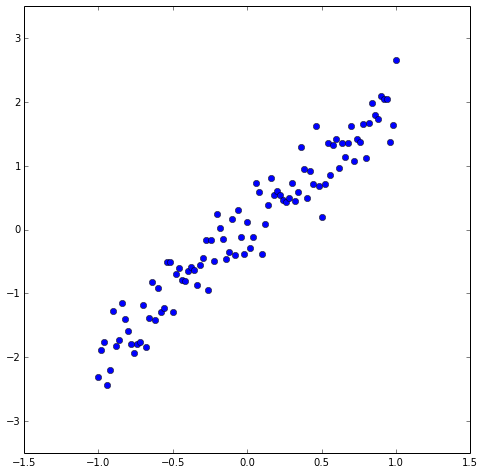

In [6]:
# generate some data at random
train_x = np.linspace(-1.0, 1.0, 101)
train_y = 2.0 * train_x + np.random.randn(*train_x.shape) * 0.33

plt.figure(figsize=(8,8))
plt.plot(train_x, train_y, 'bo')
plt.axis([-1.5, 1.5, -3.5, 3.5])

In [7]:
# initialize symbolic variables
X = T.scalar()
Y = T.scalar()

# define symbolic model
def model(X, W):
    return X * W

# initialize model parameters
W = theano.shared(np.asarray(0.0, dtype=theano.config.floatX))
y = model(X, W)

# define symbolic cost function
cost = T.mean(T.sqr(y - Y))

# determine partial derivative of cost w.r.t. parameter
gradient = T.grad(cost=cost, wrt=W)

# define how to update parameter based on gradient
updates = [[W, W - gradient * 0.01]]

# compile theano function that will perform training
train = theano.function(inputs=[X,Y], outputs=cost, updates=updates, allow_input_downcast=True)

# do training, iterate through training set 100 times
for i in range(100):
    print i, W.get_value()
    for x,y in zip(train_x, train_y):
        train(x, y)

0 0.0
1 0.992650232664
2 1.49002032181
3 1.73922895284
4 1.86409561277
5 1.92666039112
6 1.95800864286
7 1.97371576935
8 1.98158586764
9 1.98552920172
10 1.98750501994
11 1.98849500902
12 1.98899104573
13 1.98923958627
14 1.98936411818
15 1.98942651523
16 1.98945777944
17 1.98947344446
18 1.98948129346
19 1.98948522622
20 1.98948719674
21 1.98948818408
22 1.98948867878
23 1.98948892666
24 1.98948905086
25 1.98948911309
26 1.98948914427
27 1.98948915989
28 1.98948916772
29 1.98948917164
30 1.9894891736
31 1.98948917459
32 1.98948917508
33 1.98948917533
34 1.98948917545
35 1.98948917552
36 1.98948917555
37 1.98948917556
38 1.98948917557
39 1.98948917557
40 1.98948917558
41 1.98948917558
42 1.98948917558
43 1.98948917558
44 1.98948917558
45 1.98948917558
46 1.98948917558
47 1.98948917558
48 1.98948917558
49 1.98948917558
50 1.98948917558
51 1.98948917558
52 1.98948917558
53 1.98948917558
54 1.98948917558
55 1.98948917558
56 1.98948917558
57 1.98948917558
58 1.98948917558
59 1.98948917558


[-1.5, 1.5, -3.5, 3.5]

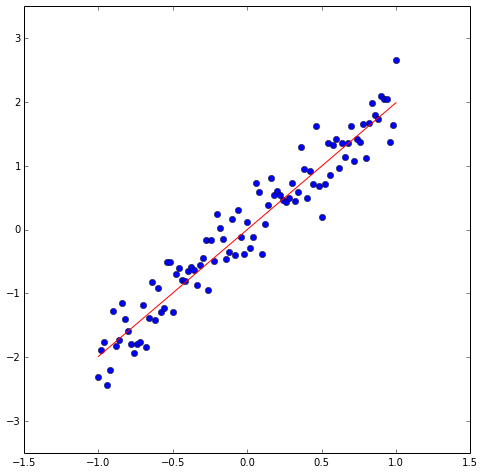

In [8]:
plt.figure(figsize=(8,8))
plt.plot(train_x, train_y, 'bo')

theta = W.get_value()
hypothesis = theta * train_x
plt.plot(train_x, hypothesis, 'r-')

plt.axis([-1.5, 1.5, -3.5, 3.5])

In [63]:
rng = np.random

N = 400                                   # training sample size
feats = 784                               # number of input variables
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

inputs, outputs = D
print inputs.shape
print inputs[0,:5]
print outputs.shape
print outputs[:25]

(400, 784)
[ 1.03691398  0.38649196 -0.44522709  0.35967913 -1.01311746]
(400,)
[0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1]


In [64]:
import numpy
import theano
import theano.tensor as T
rng = numpy.random

N = 400                                   # training sample size
feats = 784                               # number of input variables

# generate a dataset: D = (input_values, target_class)
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")

# initialize the weight vector w randomly
#
# this and the following bias variable b
# are shared so they keep their values
# between training iterations (updates)
w = theano.shared(rng.randn(feats), name="w")

# initialize the bias term
b = theano.shared(0., name="b")

print("Initial model:")
print(w.get_value())
print(b.get_value())

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))   # Probability that target = 1
prediction = p_1 > 0.5                    # The prediction thresholded
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1) # Cross-entropy loss function
cost = xent.mean() + 0.01 * (w ** 2).sum()# The cost to minimize
gw, gb = T.grad(cost, [w, b])             # Compute the gradient of the cost
                                          # w.r.t weight vector w and
                                          # bias term b
                                          # (we shall return to this in a
                                          # following section of this tutorial)

# Compile
train = theano.function(
          inputs=[x,y],
          outputs=[prediction, xent],
          updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=prediction)

# Train
for i in range(training_steps):
    pred, err = train(D[0], D[1])

print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

Initial model:
[  5.04128427e-01  -9.26702671e-02   1.54202142e+00  -9.23911779e-01
  -1.12077638e+00   1.38549497e+00   1.75633550e-01  -4.68760309e-01
  -9.43631884e-01  -1.42465213e+00   1.17725143e+00   4.34647228e-01
   1.08627482e+00   3.75908643e-01  -6.80882324e-01  -2.57674166e-01
  -3.61338645e-01   2.55563617e-01   1.24811450e+00  -7.91143798e-01
   4.26824596e-01   3.04029411e-01   2.11070763e-01  -5.59412671e-01
   1.04671825e+00   2.47298060e-01   9.07555542e-03   3.76930859e-01
  -2.50751404e-01   9.88462962e-01   4.26678740e-01  -6.94102922e-01
  -9.57564392e-01   2.03046621e+00  -4.99938934e-01   7.95708287e-01
  -9.31058184e-01   8.71132929e-01   8.49290470e-02   1.47609890e+00
   8.08383870e-01  -1.07315610e+00   1.29834485e+00   1.60918582e+00
  -2.18983902e+00   5.23820639e-01   1.88939450e-01  -1.00688124e+00
   2.61673729e+00  -1.43456756e-01   1.55463298e-02  -2.70994095e+00
  -1.35918428e+00  -4.26411852e-01   1.21747735e-01   1.16217649e+00
   6.75568125e-02  

# Classifying MNIST Digits using Logistic Regression

[Tutorial link](http://deeplearning.net/tutorial/logreg.html#logreg)



In [2]:
"""
This tutorial introduces logistic regression using Theano and stochastic
gradient descent.

Logistic regression is a probabilistic, linear classifier. It is parametrized
by a weight matrix :math:`W` and a bias vector :math:`b`. Classification is
done by projecting data points onto a set of hyperplanes, the distance to
which is used to determine a class membership probability.

Mathematically, this can be written as:

.. math::
  P(Y=i|x, W,b) &= softmax_i(W x + b) \\
                &= \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}}


The output of the model or prediction is then done by taking the argmax of
the vector whose i'th element is P(Y=i|x).

.. math::

  y_{pred} = argmax_i P(Y=i|x,W,b)


This tutorial presents a stochastic gradient descent optimization method
suitable for large datasets.


References:

    - textbooks: "Pattern Recognition and Machine Learning" -
                 Christopher M. Bishop, section 4.3.2

"""

from __future__ import print_function

__docformat__ = 'restructedtext en'

import six.moves.cPickle as pickle
import gzip
import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T


class LogisticRegression(object):
    """Multi-class Logistic Regression Class

    The logistic regression is fully described by a weight matrix :math:`W`
    and bias vector :math:`b`. Classification is done by projecting data
    points onto a set of hyperplanes, the distance to which is used to
    determine a class membership probability.
    """

    def __init__(self, input, n_in, n_out):
        """ Initialize the parameters of the logistic regression

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
                      architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
                     which the datapoints lie

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
                      which the labels lie

        """
        # start-snippet-1
        # initialize with 0 the weights W as a matrix of shape (n_in, n_out)
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )
        # initialize the biases b as a vector of n_out 0s
        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )

        # symbolic expression for computing the matrix of class-membership
        # probabilities
        # Where:
        # W is a matrix where column-k represent the separation hyperplane for
        # class-k
        # x is a matrix where row-j  represents input training sample-j
        # b is a vector where element-k represent the free parameter of
        # hyperplane-k
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        # symbolic description of how to compute prediction as class whose
        # probability is maximal
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        # end-snippet-1

        # parameters of the model
        self.params = [self.W, self.b]

        # keep track of model input
        self.input = input

    def negative_log_likelihood(self, y):
        """Return the mean of the negative log-likelihood of the prediction
        of this model under a given target distribution.

        .. math::

            \frac{1}{|\mathcal{D}|} \mathcal{L} (\theta=\{W,b\}, \mathcal{D}) =
            \frac{1}{|\mathcal{D}|} \sum_{i=0}^{|\mathcal{D}|}
                \log(P(Y=y^{(i)}|x^{(i)}, W,b)) \\
            \ell (\theta=\{W,b\}, \mathcal{D})

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label

        Note: we use the mean instead of the sum so that
              the learning rate is less dependent on the batch size
        """
        # start-snippet-2
        # y.shape[0] is (symbolically) the number of rows in y, i.e.,
        # number of examples (call it n) in the minibatch
        # T.arange(y.shape[0]) is a symbolic vector which will contain
        # [0,1,2,... n-1] T.log(self.p_y_given_x) is a matrix of
        # Log-Probabilities (call it LP) with one row per example and
        # one column per class LP[T.arange(y.shape[0]),y] is a vector
        # v containing [LP[0,y[0]], LP[1,y[1]], LP[2,y[2]], ...,
        # LP[n-1,y[n-1]]] and T.mean(LP[T.arange(y.shape[0]),y]) is
        # the mean (across minibatch examples) of the elements in v,
        # i.e., the mean log-likelihood across the minibatch.
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])
        # end-snippet-2

    def errors(self, y):
        """Return a float representing the number of errors in the minibatch
        over the total number of examples of the minibatch ; zero one
        loss over the size of the minibatch

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label
        """

        # check if y has same dimension of y_pred
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        # check if y is of the correct datatype
        if y.dtype.startswith('int'):
            # the T.neq operator returns a vector of 0s and 1s, where 1
            # represents a mistake in prediction
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()


def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)
    '''

    #############
    # LOAD DATA #
    #############

    # Download the MNIST dataset if it is not present
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split(__file__)[0],
            "..",
            "data",
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    def shared_dataset(data_xy, borrow=True):
        """ Function that loads the dataset into shared variables

        The reason we store our dataset in shared variables is to allow
        Theano to copy it into the GPU memory (when code is run on GPU).
        Since copying data into the GPU is slow, copying a minibatch everytime
        is needed (the default behaviour if the data is not in a shared
        variable) would lead to a large decrease in performance.
        """
        data_x, data_y = data_xy
        shared_x = theano.shared(numpy.asarray(data_x,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        shared_y = theano.shared(numpy.asarray(data_y,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        # When storing data on the GPU it has to be stored as floats
        # therefore we will store the labels as ``floatX`` as well
        # (``shared_y`` does exactly that). But during our computations
        # we need them as ints (we use labels as index, and if they are
        # floats it doesn't make sense) therefore instead of returning
        # ``shared_y`` we will have to cast it to int. This little hack
        # lets ous get around this issue
        return shared_x, T.cast(shared_y, 'int32')

    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), (valid_set_x, valid_set_y),
            (test_set_x, test_set_y)]
    return rval


def sgd_optimization_mnist(learning_rate=0.13, n_epochs=1000,
                           dataset='../data/mnist.pkl.gz',
                           batch_size=600):
    """
    Demonstrate stochastic gradient descent optimization of a log-linear
    model

    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
                          gradient)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                 http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

    """
    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch

    # generate symbolic variables for input (x and y represent a
    # minibatch)
    x = T.matrix('x')  # data, presented as rasterized images
    y = T.ivector('y')  # labels, presented as 1D vector of [int] labels

    # construct the logistic regression class
    # Each MNIST image has size 28*28
    classifier = LogisticRegression(input=x, n_in=28 * 28, n_out=10)

    # the cost we minimize during training is the negative log likelihood of
    # the model in symbolic format
    cost = classifier.negative_log_likelihood(y)

    # compiling a Theano function that computes the mistakes that are made by
    # the model on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    # compute the gradient of cost with respect to theta = (W,b)
    g_W = T.grad(cost=cost, wrt=classifier.W)
    g_b = T.grad(cost=cost, wrt=classifier.b)

    # start-snippet-3
    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs.
    updates = [(classifier.W, classifier.W - learning_rate * g_W),
               (classifier.b, classifier.b - learning_rate * g_b)]

    # compiling a Theano function `train_model` that returns the cost, but in
    # the same time updates the parameter of the model based on the rules
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-3

    ###############
    # TRAIN MODEL #
    ###############
    print('... training the model')
    # early-stopping parameters
    patience = 5000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                                  # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                  # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = numpy.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0
    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i)
                                     for i in range(n_valid_batches)]
                this_validation_loss = numpy.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if this_validation_loss < best_validation_loss *  \
                       improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    # test it on the test set

                    test_losses = [test_model(i)
                                   for i in range(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                    print(
                        (
                            '     epoch %i, minibatch %i/%i, test error of'
                            ' best model %f %%'
                        ) %
                        (
                            epoch,
                            minibatch_index + 1,
                            n_train_batches,
                            test_score * 100.
                        )
                    )

                    # save the best model
                    with open('best_model.pkl', 'wb') as f:
                        pickle.dump(classifier, f)

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(
        (
            'Optimization complete with best validation score of %f %%,'
            'with test performance %f %%'
        )
        % (best_validation_loss * 100., test_score * 100.)
    )
    print('The code run for %d epochs, with %f epochs/sec' % (
        epoch, 1. * epoch / (end_time - start_time)))
    print(('The code for file ' +
           os.path.split(dataset)[1] +
           ' ran for %.1fs' % ((end_time - start_time))), file=sys.stderr)


def predict():
    """
    An example of how to load a trained model and use it
    to predict labels.
    """

    # load the saved model
    classifier = pickle.load(open('best_model.pkl'))

    # compile a predictor function
    predict_model = theano.function(
        inputs=[classifier.input],
        outputs=classifier.y_pred)

    # We can test it on some examples from test test
    dataset='mnist.pkl.gz'
    datasets = load_data(dataset)
    test_set_x, test_set_y = datasets[2]
    test_set_x = test_set_x.get_value()

    predicted_values = predict_model(test_set_x[:10])
    print("Predicted values for the first 10 examples in test set:")
    print(predicted_values)


In [3]:
sgd_optimization_mnist()

... loading data
... building the model
... training the model
epoch 1, minibatch 83/83, validation error 12.458333 %
     epoch 1, minibatch 83/83, test error of best model 12.375000 %
epoch 2, minibatch 83/83, validation error 11.010417 %
     epoch 2, minibatch 83/83, test error of best model 10.958333 %
epoch 3, minibatch 83/83, validation error 10.312500 %
     epoch 3, minibatch 83/83, test error of best model 10.312500 %
epoch 4, minibatch 83/83, validation error 9.875000 %
     epoch 4, minibatch 83/83, test error of best model 9.833333 %
epoch 5, minibatch 83/83, validation error 9.562500 %
     epoch 5, minibatch 83/83, test error of best model 9.479167 %
epoch 6, minibatch 83/83, validation error 9.322917 %
     epoch 6, minibatch 83/83, test error of best model 9.291667 %
epoch 7, minibatch 83/83, validation error 9.187500 %
     epoch 7, minibatch 83/83, test error of best model 9.000000 %
epoch 8, minibatch 83/83, validation error 8.989583 %
     epoch 8, minibatch 83/83,

The code for file mnist.pkl.gz ran for 22.7s


# Theano and Multilayer Perceptron

In [4]:
from __future__ import print_function

__docformat__ = 'restructedtext en'


import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T


# instead of importing from file, we assume cell above was run to define the
# LogisticRegression class and the load_data() function.
#from logistic_sgd import LogisticRegression, load_data


# start-snippet-1
class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, W=None, b=None,
                 activation=T.tanh):
        """
        Typical hidden layer of a MLP: units are fully-connected and have
        sigmoidal activation function. Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        Hidden unit activation is given by: tanh(dot(input,W) + b)

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.dmatrix
        :param input: a symbolic tensor of shape (n_examples, n_in)

        :type n_in: int
        :param n_in: dimensionality of input

        :type n_out: int
        :param n_out: number of hidden units

        :type activation: theano.Op or function
        :param activation: Non linearity to be applied in the hidden
                           layer
        """
        self.input = input
        # end-snippet-1

        # `W` is initialized with `W_values` which is uniformely sampled
        # from sqrt(-6./(n_in+n_hidden)) and sqrt(6./(n_in+n_hidden))
        # for tanh activation function
        # the output of uniform if converted using asarray to dtype
        # theano.config.floatX so that the code is runable on GPU
        # Note : optimal initialization of weights is dependent on the
        #        activation function used (among other things).
        #        For example, results presented in [Xavier10] suggest that you
        #        should use 4 times larger initial weights for sigmoid
        #        compared to tanh
        #        We have no info for other function, so we use the same as
        #        tanh.
        if W is None:
            W_values = numpy.asarray(
                rng.uniform(
                    low=-numpy.sqrt(6. / (n_in + n_out)),
                    high=numpy.sqrt(6. / (n_in + n_out)),
                    size=(n_in, n_out)
                ),
                dtype=theano.config.floatX
            )
            if activation == theano.tensor.nnet.sigmoid:
                W_values *= 4

            W = theano.shared(value=W_values, name='W', borrow=True)

        if b is None:
            b_values = numpy.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b', borrow=True)

        self.W = W
        self.b = b

        lin_output = T.dot(input, self.W) + self.b
        self.output = (
            lin_output if activation is None
            else activation(lin_output)
        )
        # parameters of the model
        self.params = [self.W, self.b]


# start-snippet-2
class MLP(object):
    """Multi-Layer Perceptron Class

    A multilayer perceptron is a feedforward artificial neural network model
    that has one layer or more of hidden units and nonlinear activations.
    Intermediate layers usually have as activation function tanh or the
    sigmoid function (defined here by a ``HiddenLayer`` class)  while the
    top layer is a softmax layer (defined here by a ``LogisticRegression``
    class).
    """

    def __init__(self, rng, input, n_in, n_hidden, n_out):
        """Initialize the parameters for the multilayer perceptron

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
        architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
        which the datapoints lie

        :type n_hidden: int
        :param n_hidden: number of hidden units

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
        which the labels lie

        """

        # Since we are dealing with a one hidden layer MLP, this will translate
        # into a HiddenLayer with a tanh activation function connected to the
        # LogisticRegression layer; the activation function can be replaced by
        # sigmoid or any other nonlinear function
        self.hiddenLayer = HiddenLayer(
            rng=rng,
            input=input,
            n_in=n_in,
            n_out=n_hidden,
            activation=T.tanh
        )

        # The logistic regression layer gets as input the hidden units
        # of the hidden layer
        self.logRegressionLayer = LogisticRegression(
            input=self.hiddenLayer.output,
            n_in=n_hidden,
            n_out=n_out
        )
        # end-snippet-2 start-snippet-3
        # L1 norm ; one regularization option is to enforce L1 norm to
        # be small
        self.L1 = (
            abs(self.hiddenLayer.W).sum()
            + abs(self.logRegressionLayer.W).sum()
        )

        # square of L2 norm ; one regularization option is to enforce
        # square of L2 norm to be small
        self.L2_sqr = (
            (self.hiddenLayer.W ** 2).sum()
            + (self.logRegressionLayer.W ** 2).sum()
        )

        # negative log likelihood of the MLP is given by the negative
        # log likelihood of the output of the model, computed in the
        # logistic regression layer
        self.negative_log_likelihood = (
            self.logRegressionLayer.negative_log_likelihood
        )
        # same holds for the function computing the number of errors
        self.errors = self.logRegressionLayer.errors

        # the parameters of the model are the parameters of the two layer it is
        # made out of
        self.params = self.hiddenLayer.params + self.logRegressionLayer.params
        # end-snippet-3

        # keep track of model input
        self.input = input


def test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,
             dataset='../data/mnist.pkl.gz', batch_size=20, n_hidden=500):
    """
    Demonstrate stochastic gradient descent optimization for a multilayer
    perceptron

    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
    gradient

    :type L1_reg: float
    :param L1_reg: L1-norm's weight when added to the cost (see
    regularization)

    :type L2_reg: float
    :param L2_reg: L2-norm's weight when added to the cost (see
    regularization)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                 http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz


   """
    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch
    x = T.matrix('x')  # the data is presented as rasterized images
    y = T.ivector('y')  # the labels are presented as 1D vector of
                        # [int] labels

    rng = numpy.random.RandomState(1234)

    # construct the MLP class
    classifier = MLP(
        rng=rng,
        input=x,
        n_in=28 * 28,
        n_hidden=n_hidden,
        n_out=10
    )

    # start-snippet-4
    # the cost we minimize during training is the negative log likelihood of
    # the model plus the regularization terms (L1 and L2); cost is expressed
    # here symbolically
    cost = (
        classifier.negative_log_likelihood(y)
        + L1_reg * classifier.L1
        + L2_reg * classifier.L2_sqr
    )
    # end-snippet-4

    # compiling a Theano function that computes the mistakes that are made
    # by the model on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size:(index + 1) * batch_size],
            y: test_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size:(index + 1) * batch_size],
            y: valid_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

    # start-snippet-5
    # compute the gradient of cost with respect to theta (sorted in params)
    # the resulting gradients will be stored in a list gparams
    gparams = [T.grad(cost, param) for param in classifier.params]

    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs

    # given two lists of the same length, A = [a1, a2, a3, a4] and
    # B = [b1, b2, b3, b4], zip generates a list C of same size, where each
    # element is a pair formed from the two lists :
    #    C = [(a1, b1), (a2, b2), (a3, b3), (a4, b4)]
    updates = [
        (param, param - learning_rate * gparam)
        for param, gparam in zip(classifier.params, gparams)
    ]

    # compiling a Theano function `train_model` that returns the cost, but
    # in the same time updates the parameter of the model based on the rules
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-5

    ###############
    # TRAIN MODEL #
    ###############
    print('... training')

    # early-stopping parameters
    patience = 10000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                           # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                   # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = numpy.inf
    best_iter = 0
    test_score = 0.
    start_time = timeit.default_timer()

    epoch = 0
    done_looping = False

    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in range(n_valid_batches)]
                this_validation_loss = numpy.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if (
                        this_validation_loss < best_validation_loss *
                        improvement_threshold
                    ):
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = [test_model(i) for i
                                   in range(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(('Optimization complete. Best validation score of %f %% '
           'obtained at iteration %i, with test performance %f %%') %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))
    print(('The code for file ' +
           os.path.split(dataset)[1] +
           ' ran for %.2fm' % ((end_time - start_time) / 60.)), file=sys.stderr)


In [6]:
test_mlp()

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation error 9.620000 %
     epoch 1, minibatch 2500/2500, test error of best model 10.090000 %
epoch 2, minibatch 2500/2500, validation error 8.610000 %
     epoch 2, minibatch 2500/2500, test error of best model 8.740000 %
epoch 3, minibatch 2500/2500, validation error 8.000000 %
     epoch 3, minibatch 2500/2500, test error of best model 8.160000 %
epoch 4, minibatch 2500/2500, validation error 7.600000 %
     epoch 4, minibatch 2500/2500, test error of best model 7.790000 %
epoch 5, minibatch 2500/2500, validation error 7.300000 %
     epoch 5, minibatch 2500/2500, test error of best model 7.590000 %
epoch 6, minibatch 2500/2500, validation error 7.020000 %
     epoch 6, minibatch 2500/2500, test error of best model 7.200000 %
epoch 7, minibatch 2500/2500, validation error 6.680000 %
     epoch 7, minibatch 2500/2500, test error of best model 6.990000 %
epoch 8, minibatch 2500/2500, validation er

KeyboardInterrupt: 